# Curso Data Science do Zero - Minerando Dados

## 5º Capítulo: Pre-processamento de Dados ##

### Técnicas de processamento de Dados - Discretização

##### importando a biblioteca pandas

In [1]:
import pandas as pd

##### cojunto de dados de exemplo

In [2]:
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

##### aplicando a discretização em 3 bins de tamanho igual e com os labels P, M e G

In [3]:
altura = pd.qcut(altura,3,labels=['P','M','G'])

In [4]:
print(altura)

['P', 'P', 'M', 'M', 'G', 'G']
Categories (3, object): ['P' < 'M' < 'G']


##### verificando a quantidade de objetos em cada bin

In [5]:
altura.value_counts()

P    2
M    2
G    2
Name: count, dtype: int64

##### lendo a base de dados

In [6]:
dataset = pd.read_csv('kc_house_data.csv')

##### contando o número de pisos

In [7]:
dataset['floors'].value_counts()

floors
1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

##### discretizando os valores do atributo floors e armazenando o resultado no atributo floors_labels

In [8]:
dataset['floors_labels'] = pd.cut(
    dataset['floors'],
    5,
    labels=['Muito-Pequeno','Pequeno','Medio','Grande','Muito-Grande']
)

##### verificando o novo atributo

In [9]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_labels
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Muito-Pequeno
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Pequeno
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Muito-Pequeno
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Muito-Pequeno
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Muito-Pequeno
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Muito-Pequeno
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Pequeno
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Muito-Pequeno
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Muito-Pequeno
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Pequeno


##### verificando os valores únicos do atributo

In [10]:
dataset['floors_labels'].unique()

['Muito-Pequeno', 'Pequeno', NaN, 'Grande', 'Medio', 'Muito-Grande']
Categories (5, object): ['Muito-Pequeno' < 'Pequeno' < 'Medio' < 'Grande' < 'Muito-Grande']

##### contagem de valores em cada bin ou categoria

In [11]:
dataset['floors_labels'].value_counts()

floors_labels
Muito-Pequeno    12589
Pequeno           8241
Grande             613
Medio              161
Muito-Grande         8
Name: count, dtype: int64

### Técnicas de processamento de Dados - Normalização de dados

##### norma L2 é definida como a raiz quadrada do somatório de todos os elementos do vetor ao quadrado.

![l2-norma](l2-norma.png)

##### vejamos um simples exemplo do calculo da norma l2.

![l2-norma-exemplo](l2-norma-exemplo.png)

##### importando as bibliotecas necessárias.

In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### alguns dados de exemplo

In [13]:
data = [
    [-1, 2],
    [0.5, 6],
    [0, 10],
    [1, 18]
]
print (data)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


#### valor da média

In [14]:
print (np.mean(data))

4.5625


#### visualizando a distribuição dos dados

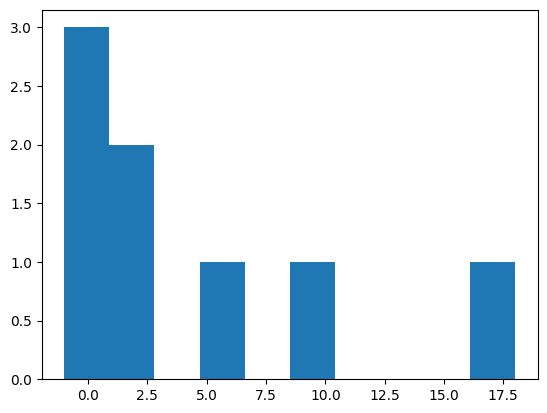

In [18]:
# sns.displot(np.array(data).reshape(-1))
# plt.show()

plt.hist(np.array(data).reshape(-1))
plt.show()


##### instanciando o objeto Normalize

In [19]:
normalizer = Normalizer().fit(data)

##### aplicando a normalização nos dados de exemplo utilizando a norma l2

In [20]:
data2 = normalizer.transform(data)
print(data2)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


#### Alterando a forma dos dados para apenas uma dimensão

In [22]:
data2 = data2.reshape(-1)
data2

array([-0.4472136 ,  0.89442719,  0.08304548,  0.99654576,  0.        ,
        1.        ,  0.05547002,  0.99846035])

#### valor da média

In [23]:
print(np.mean(data2))

0.4475919008033141


OptionError: No such keys(s): 'mode.use_inf_as_null'

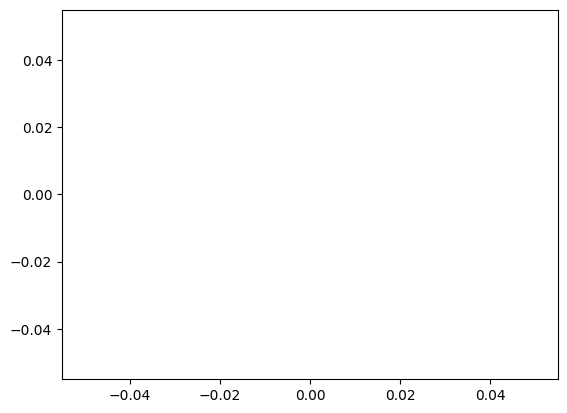

In [25]:
sns.histplot(data2)
plt.show()

### Técnicas de pre-processamento de Dados - Standartization

In [26]:
data = np.random.normal(size = 50)
print(data)

[ 0.6122278  -0.52247157  2.18544409  2.67346141  0.54951236 -0.14008721
 -0.10769783 -0.33636843 -1.55821487  1.10757358  2.05059591  0.57042566
  1.5529013  -1.57049405  0.49266825 -0.43423968 -0.00860741  0.23864707
 -0.49803818  1.36542217  0.20062312  0.06141803  0.22504934  0.76201846
 -1.2849651   0.54194939 -0.4280443  -0.347006   -0.67102435  2.11963927
 -1.81252731  0.05380287 -1.71765459 -0.03666172 -0.51754703 -0.84748086
 -1.95739732 -1.53801777 -1.43967147 -0.23742874 -0.88983986  0.90777462
 -0.45758058  0.26531245  1.14341748 -0.23992389 -1.01443196  0.47410804
 -1.17340313 -1.02546408]


#### Alterando a forma dos dados para apenas uma dimensão

In [27]:
data = data.reshape(-1,1)
data

array([[ 0.6122278 ],
       [-0.52247157],
       [ 2.18544409],
       [ 2.67346141],
       [ 0.54951236],
       [-0.14008721],
       [-0.10769783],
       [-0.33636843],
       [-1.55821487],
       [ 1.10757358],
       [ 2.05059591],
       [ 0.57042566],
       [ 1.5529013 ],
       [-1.57049405],
       [ 0.49266825],
       [-0.43423968],
       [-0.00860741],
       [ 0.23864707],
       [-0.49803818],
       [ 1.36542217],
       [ 0.20062312],
       [ 0.06141803],
       [ 0.22504934],
       [ 0.76201846],
       [-1.2849651 ],
       [ 0.54194939],
       [-0.4280443 ],
       [-0.347006  ],
       [-0.67102435],
       [ 2.11963927],
       [-1.81252731],
       [ 0.05380287],
       [-1.71765459],
       [-0.03666172],
       [-0.51754703],
       [-0.84748086],
       [-1.95739732],
       [-1.53801777],
       [-1.43967147],
       [-0.23742874],
       [-0.88983986],
       [ 0.90777462],
       [-0.45758058],
       [ 0.26531245],
       [ 1.14341748],
       [-0

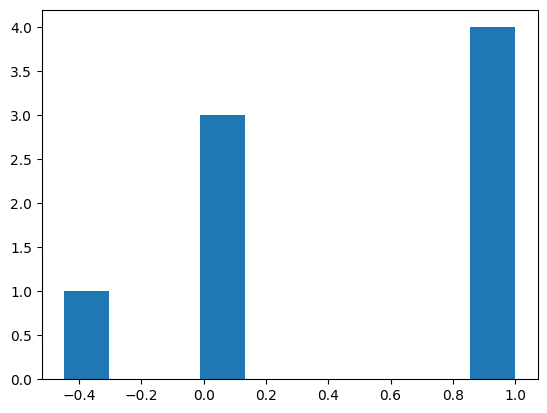

In [28]:
plt.hist(data2)
plt.show()

##### importando as bibliotecas necessárias.

In [29]:
from sklearn.preprocessing import MinMaxScaler

##### instânciando o objeto scaler

In [30]:
scaler = MinMaxScaler().fit(data)

##### transformando os dados com o objeto scaler

In [31]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[0.55489171]
 [0.3098617 ]
 [0.89461623]
 [1.        ]
 [0.54134877]
 [0.3924348 ]
 [0.39942905]
 [0.35004931]
 [0.08620052]
 [0.661858  ]
 [0.86549676]
 [0.54586484]
 [0.75802326]
 [0.08354892]
 [0.5290737 ]
 [0.32891473]
 [0.4208269 ]
 [0.47421969]
 [0.31513791]
 [0.71753851]
 [0.4660087 ]
 [0.43594838]
 [0.47128336]
 [0.5872379 ]
 [0.14520681]
 [0.5397156 ]
 [0.33025257]
 [0.3477522 ]
 [0.27778281]
 [0.88040617]
 [0.03128362]
 [0.43430394]
 [0.05177068]
 [0.41476877]
 [0.31092512]
 [0.23967832]
 [0.        ]
 [0.09056194]
 [0.1117991 ]
 [0.37141461]
 [0.23053121]
 [0.61871288]
 [0.32387443]
 [0.47997788]
 [0.66959823]
 [0.3708758 ]
 [0.20362646]
 [0.52506576]
 [0.1692978 ]
 [0.20124415]]


#### Alterando a forma dos dados para apenas uma dimensão

In [32]:
data_scaled = data_scaled.reshape(-1,1)

In [ ]:
sns.distplot(data_scaled)
plt.show()

# StandardScaler - Técnica de Pré-Processamento

* Padroniza a escala dos dados sem interferir na sua forma

* Mantém a escala dos dados mais fiel que a Técnica MinMaxScale

In [ ]:
data = np.random.normal(size = 50)
print(data)

#### Alterando a forma dos dados para apenas uma dimensão

In [ ]:
data = data.reshape(-1,1)

In [ ]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [ ]:
from sklearn.preprocessing import StandardScaler

##### instânciando o objeto scaler

In [ ]:
scaler = StandardScaler().fit(data)

##### transformando os dados com o objeto scaler

In [ ]:
data_scaled = scaler.transform(data)
print(data_scaled)

#### Alterando a forma dos dados para apenas uma dimensão

In [ ]:
data_scaled = data_scaled.reshape(-1,1)

In [ ]:
sns.distplot(data_scaled)
plt.show()